## Assignment Questions

In [34]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
# Checking version of Tensorflow and Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.10.0
Keras Version 2.10.0


In [36]:
df=pd.read_csv("wine.csv")

In [37]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [38]:
df.shape

(1599, 12)

In [39]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [40]:
# Calculate class distribution
class_distribution = df['quality'].value_counts()

# Display the class distribution
print(class_distribution)

# Check if the target variable is imbalanced
if len(class_distribution) == 2:
    majority_class_count = max(class_distribution)
    minority_class_count = min(class_distribution)
    class_ratio = majority_class_count / minority_class_count
    
    if class_ratio > 2:
        print("The target variable is imbalanced.")
    else:
        print("The target variable is not imbalanced.")
else:
    print("The target variable is not binary.")

good    855
bad     744
Name: quality, dtype: int64
The target variable is not imbalanced.


__As Our target vaiable is not imbalanced__

In [41]:
print('Checking for Null values in the dataframe:','\n',df.isnull().sum(),'\n')

Checking for Null values in the dataframe: 
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64 



<Axes: >

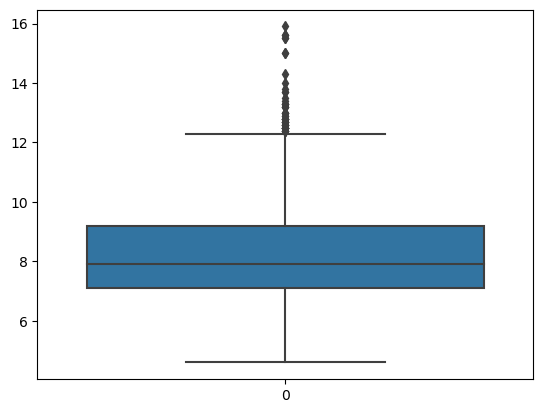

In [42]:
sns.boxplot(df['fixed acidity'])

<Axes: >

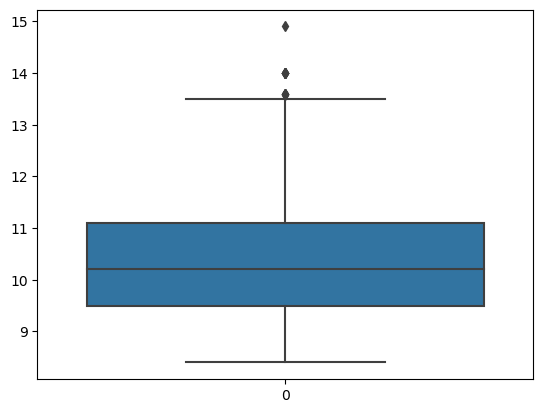

In [43]:
sns.boxplot(df['alcohol'])

As we have some Outliers in data , But we are using Deep Learning Model so dont worry

In [44]:
y = df.quality
X = df.drop(columns = ['quality'])

In [45]:
X.shape

(1599, 11)

In [46]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [47]:
y.head()

0     bad
1     bad
2     bad
3    good
4     bad
Name: quality, dtype: object

As we have our Target Feature in "Good" or "Bad" so we use Label encoder

In [48]:
# Let's perform categorical features encoding:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [49]:
# Target_feature Encoding:
y = LE.fit_transform(y)

In [50]:
y  # 0= bad 1=Good

array([0, 0, 0, ..., 1, 0, 1])

In [51]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [52]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(1199, 11)
(400, 11)
(899, 11)
(300, 11)


In [53]:
X_train.shape[1:]

(11,)

In [54]:
X_train.shape[1:]

(11,)

In [55]:
y_train.shape[:1]

(899,)

In [56]:
# Creating layers of ANN
LAYERS = [
    tf.keras.layers.Dense(30, activation="relu", name="HiddenLayer1", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu", name="HiddenLayer2"),
    tf.keras.layers.Dense(5, activation='relu', name="HiddenLayer3"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="OutputLayer")
]

# Create the model using Sequential API
model = tf.keras.models.Sequential(LAYERS)

In [57]:
# Logging

import time 

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit\log_2023_07_31_21_39_54


In [58]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [59]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [60]:
# Q13. Use binary cross-entropy as the loss function, Adam optimizer, and ['accuracy'] as the metric
loss_function = 'binary_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

# Q14. Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

In [61]:
# Q12. Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 30)                360       
                                                                 
 HiddenLayer2 (Dense)        (None, 10)                310       
                                                                 
 HiddenLayer3 (Dense)        (None, 5)                 55        
                                                                 
 OutputLayer (Dense)         (None, 1)                 6         
                                                                 
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


In [62]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [68]:
# Orginal train

EPOCHS = 40
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=64, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )

Epoch 1/40
15/15 [==============================] - 1s 20ms/step - loss: 0.4931 - accuracy: 0.7575 - val_loss: 0.5633 - val_accuracy: 0.7333
Epoch 2/40
15/15 [==============================] - 0s 11ms/step - loss: 0.4900 - accuracy: 0.7608 - val_loss: 0.5635 - val_accuracy: 0.7233
Epoch 3/40
15/15 [==============================] - 0s 12ms/step - loss: 0.4862 - accuracy: 0.7631 - val_loss: 0.5632 - val_accuracy: 0.7233
Epoch 4/40
15/15 [==============================] - 0s 17ms/step - loss: 0.4844 - accuracy: 0.7608 - val_loss: 0.5631 - val_accuracy: 0.7333
Epoch 5/40
15/15 [==============================] - 0s 11ms/step - loss: 0.4816 - accuracy: 0.7620 - val_loss: 0.5643 - val_accuracy: 0.7300
Epoch 6/40
15/15 [==============================] - 0s 12ms/step - loss: 0.4788 - accuracy: 0.7653 - val_loss: 0.5647 - val_accuracy: 0.7200
Epoch 7/40
15/15 [==============================] - 0s 12ms/step - loss: 0.4773 - accuracy: 0.7631 - val_loss: 0.5635 - val_accuracy: 0.7300
Epoch 8/40
15

In [69]:
# Q16. Get the model's parameters
model_params = model.get_weights()

# Q17. Store the model's training history as a Pandas DataFrame
history_df = pd.DataFrame(history.history)

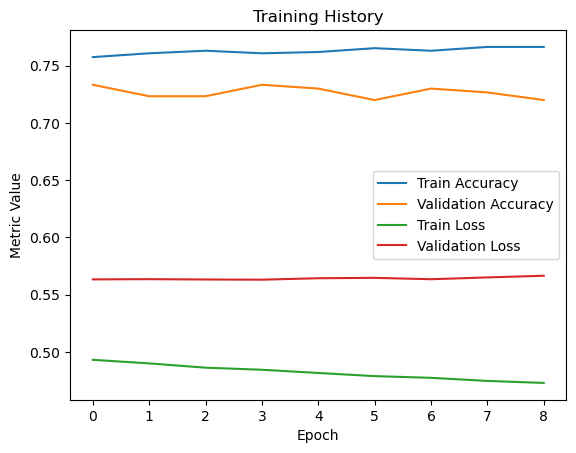

13/13 [==============================] - 0s 4ms/step - loss: 0.5381 - accuracy: 0.7400
Test Loss: 0.5381, Test Accuracy: 0.7400


In [70]:
# Q18. Plot the model's training history
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Training History')
plt.show()

# Q19. Evaluate the model's performance using the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

In [71]:
X_test.shape

(400, 11)

In [72]:
new = X_test[0]

In [74]:
new.reshape((1,11))

array([[-0.34408707,  0.15940242, -0.98437473, -0.02598979,  0.46615703,
        -0.18979812, -0.0378264 ,  0.21710754, -0.46498919, -0.02247738,
        -0.78903789]])

In [81]:
model.predict(new.reshape((1,11)))

1/1 [==============================] - 0s 64ms/step


array([[0.39237672]], dtype=float32)

In [83]:
# Assuming you have already trained the model and loaded the test data (X_test, y_test)

# Make predictions on the test data using the trained model
y_pred_probs = model.predict(X_test)

# Convert the predicted probabilities to class labels (0 or 1)
y_pred_labels = (y_pred_probs > 0.5).astype(int)

# If you have used the sigmoid activation function in the output layer
# and want to predict the class with the highest probability directly:
# y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Print the classification report
class_report = classification_report(y_test, y_pred_labels)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

13/13 [==============================] - 0s 4ms/step
Accuracy: 0.74
Confusion Matrix:
[[137  41]
 [ 63 159]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.72       178
           1       0.80      0.72      0.75       222

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.75      0.74      0.74       400



In [87]:
# Assuming you have already trained the model and loaded the test data (X_test)

# Make predictions on the test data using the trained model
y_pred_probs = model.predict(X_test)

# Verify the shape of the y_pred_probs array
print("Shape of y_pred_probs:", y_pred_probs.shape)

# Assuming '0' represents 'Bad' and '1' represents 'Good',
# you can access the probability of 'Good' wine for the first sample (index 0) as follows:
prob_good = y_pred_probs[0][0]

print("Probability of Good Wine:", prob_good)

13/13 [==============================] - 0s 4ms/step
Shape of y_pred_probs: (400, 1)
Probability of Good Wine: 0.39237672
